# **Implementación Cascadas de Haar**

## Características de Haar
#### El algoritmo de Cascadas de Haar usa filtros restangulares que detectan contrastes de intensidad (claros/oscuros) en la imagen, características típicas de un rostro.
#### * Borde horizontal (Separación frente-cejas)
#### * Borde vertical (Nariz-mejillas)
#### * Rectángulos centrados (Ojos, región oscura sobre fondo claro)
#### * Linea horizontal (Boca)

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

(500, 400)
(300, 300)


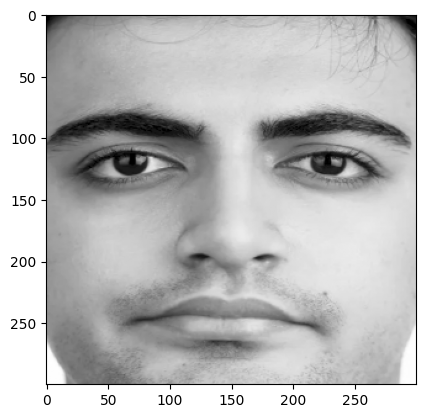

In [12]:
cara = cv.imread("cara.png", cv.IMREAD_GRAYSCALE)   # Cargo la imagen de la cara con la que voy a realizar las pruebas.
print(cara.shape)   # Obtengo tamaño de la imagen
cara = cv.resize(cara, (300, 300))  # Redimensionar la imagen para verlo mejor (300x300 pixeles)
print(cara.shape)
plt.imshow(cara, cmap='gray', vmin=0, vmax=255)
plt.show()

In [13]:
"""
Edge Features (Características de borde)
Voy a crear dos kernels
"""

# Este primer kernel tendrá de tamaño 2 filas por 3 columnas. La fila de arriba será de -1's y la de abajo de 1's.
kernel1 = np.zeros((2, 3), dtype=np.int8)
kernel1[:1, :] = -1  
kernel1[1:, :] = 1
print("Kernel1:\n", kernel1)    # Imprimo kernel

# Este segundo kernel tendrá de tamaño 2 filas por 4 columnas. Las dos primeras columnas serán de -1's y las dos últimas de 1's.
kernel2 = np.zeros((2, 4), dtype=np.int8)
kernel2[:, :2] = -1  
kernel2[:, 2:] = 1
print("Kernel2:\n", kernel2)    # Imprimo kernel

Kernel1:
 [[-1 -1 -1]
 [ 1  1  1]]
Kernel2:
 [[-1 -1  1  1]
 [-1 -1  1  1]]


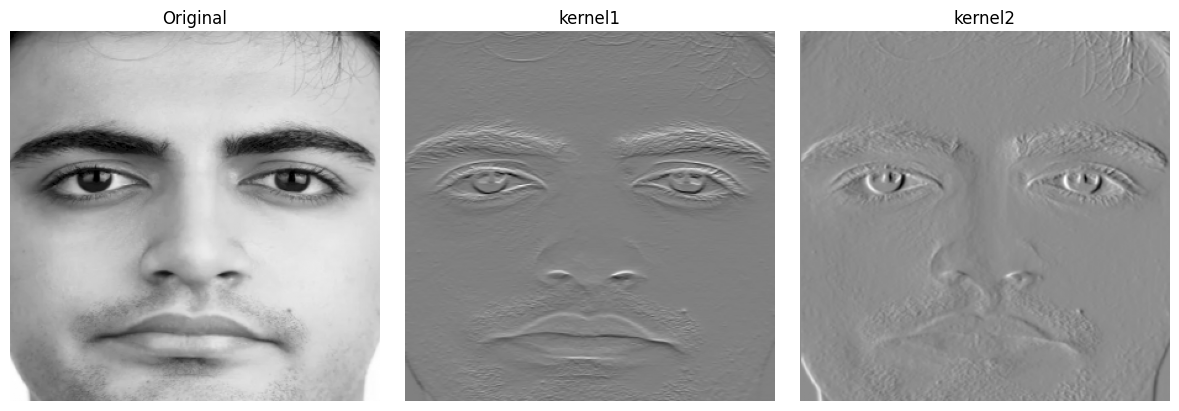

In [14]:
"""Aplicar cada filtro y mostrar resultados"""

# Mustro la imagen original
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(cara, cmap='gray')
plt.title('Original')
plt.axis('off')

# Utilizo la función convolved2d con el kernel1 y muestro la imagen
filtered1 = convolve2d(cara, kernel1, mode='same', boundary='symm')
plt.subplot(2, 3, 2)
plt.imshow(filtered1, cmap='gray')
plt.title('kernel1')
plt.axis('off')

# Utiliza la función convelved2d con el kernel2 y muestro la imagen
filtered2 = convolve2d(cara, kernel2, mode='same', boundary='symm')
plt.subplot(2, 3, 3)
plt.imshow(filtered2, cmap='gray')
plt.title('kernel2')
plt.axis('off')

# Mustro las tres imagen juntas.
plt.tight_layout()
plt.show()



In [15]:
"""
Line Features (Características de linea)
Voy a crear dos kernels
"""

# Este tercer kernel tiene tamaño 2 filas por 3 columnas. La columna del centro será de 1's y el resto de -1's
kernel3 = np.zeros((2, 3), dtype=np.int8)
kernel3[:, :] = -1  
kernel3[:, 1:2] = 1
print("Kernel3:\n", kernel3)    # Muestro el kernel

# Este cuarto kernel tiene tamaño 3 filas por 3 columnas. La fila del centro será de 1's y el resto de -1's
kernel4 = np.zeros((3, 3), dtype=np.int8)
kernel4[:, :] = -1  
kernel4[1:2, :] = 1
print("Kernel4:\n", kernel4)    # Muestro el kernel

Kernel3:
 [[-1  1 -1]
 [-1  1 -1]]
Kernel4:
 [[-1 -1 -1]
 [ 1  1  1]
 [-1 -1 -1]]


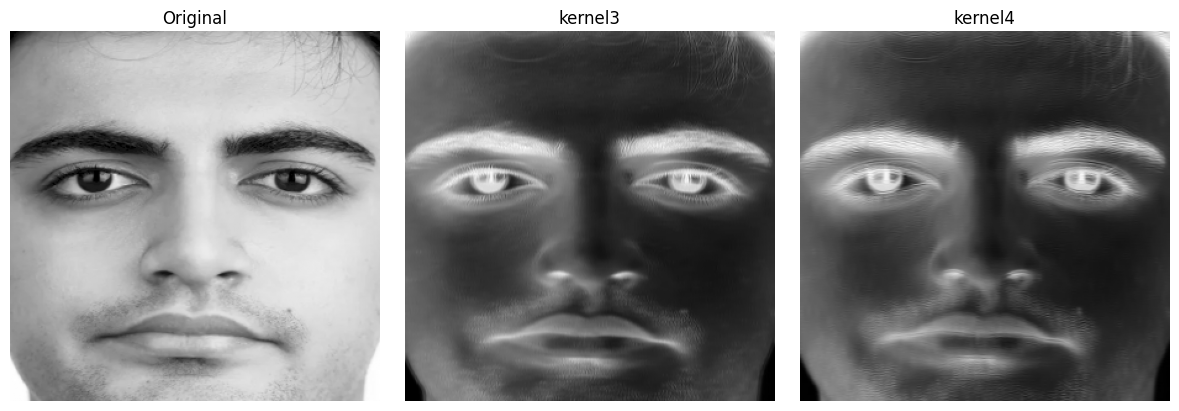

In [16]:
"""Aplicar cada filtro y mostrar resultados"""

# Muestro la imagen original
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(cara, cmap='gray')
plt.title('Original')
plt.axis('off')

# Utilizo la función convolved2d y el kernel3 y muestro la imagen
filtered3 = convolve2d(cara, kernel3, mode='same', boundary='symm')
plt.subplot(2, 3, 2)
plt.imshow(filtered3, cmap='gray')
plt.title('kernel3')
plt.axis('off')

# Utilizo la función convolved2d y el kernel4 y muestro la imagen
filtered4 = convolve2d(cara, kernel4, mode='same', boundary='symm')
plt.subplot(2, 3, 3)
plt.imshow(filtered4, cmap='gray')
plt.title('kernel4')
plt.axis('off')

# Muestro las imágenes juntas
plt.tight_layout()
plt.show()


In [17]:
"""
Four-rectangle features
Voy a crear un kernel
"""

# Este quinto kernel tendrá tamaño 4 filas por 4 columnas. Como se puede ver a continuacion se divide en cuatro partes iguales, cada una formada por 2 filas y dos columnas.
kernel5 = np.zeros((4, 4), dtype=np.int8)
kernel5[:, :] = -1  
kernel5[:2, 2:] = 1
kernel5[2:, :2] = 1
print("Kernel5:\n", kernel5)

Kernel5:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]


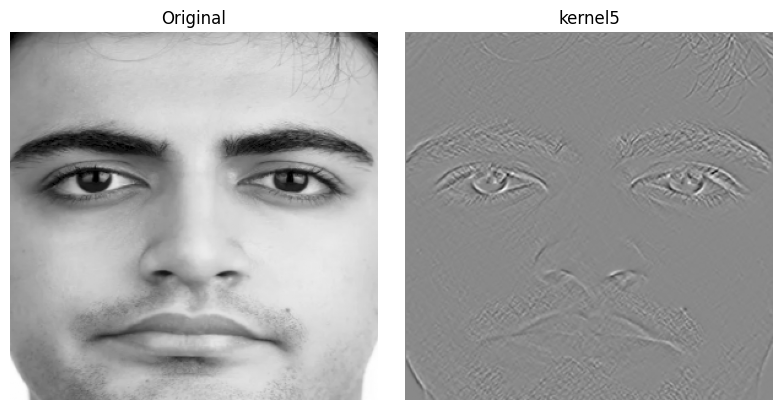

In [18]:
"""Aplicar cada filtro y mostrar resultados"""

# Muestro la imagen original
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(cara, cmap='gray')
plt.title('Original')
plt.axis('off')

# Utilizo la función convolved2d y el kernel5 y muestro la imagen
filtered5 = convolve2d(cara, kernel5, mode='same', boundary='symm')
plt.subplot(2, 3, 2)
plt.imshow(filtered5, cmap='gray')
plt.title('kernel5')
plt.axis('off')

# Muestro las dos imagen juntas
plt.tight_layout()
plt.show()